# Importing Data in Python Part I

## Importing Flat Files

### Reading a text file

* 1) Assign filename to a variable
* 2) Pass the filename to the fuction open()
    * mode = 'r' sets the file to ReadOnly
* 3) Assign the text from the file to a variable, 'text', by using the read() method
* 4) Close the connection

In [1]:
filename = 'sample_data/flat_file_1.txt'
file = open(filename, mode='r')
text = file.read()

print(text)

file.close()

Lorem ipsum dolor sit amet, pri ex nullam accusata.
In prima error accommodare vis, ad semper offendit interpretaris mea.
Cum ne atqui malorum eligendi, labore pertinax euripidis ei his. Vel meis salutatus quaerendum ex. Consetetur theophrastus contentiones pro ut. Est ei quem copiosae.


### Context manager 'with'

You can avoid having to close the conneciton to the file by using a ***with*** statement. This allows you to create a context in which you can execute commands with file open

Once out of this clause, the file is no longer open, and for this reason, is called a **Context Manager**. This is known as binding. It is considered best practices to use the ***with*** statement to never have to concern yourself with closing te files again

with open('flat_file_1.txt', 'r') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

## The Importance of Flat Files in Data Science

### Flat Files
May Consist of ...
* Text files containing records
* Table Data
* Record: Row of Fields of Attributes
* Column: Feature or Attribute

Certain Flat Files may include a **Header**, which is a Row, which shows up as the 1st Row and describes the contents of the data columns

#### Extension
* .csv - Comma separated values
* .txt - Text file
* commas, tabs - Delimiters
    * Values can be separated by characters or seqences of characters
    * Most common delimiters are commas and tabs
    
### How do you import flat files?
* NumPy  - Store numbers into a numpy array
    * .loadtxt()
* pandas - Store data into a data frame

## Importing Flat Files using NumPy

In [2]:
import numpy as np
file = 'sample_data/digits.csv'
# Skips 1st Header Row, and set all cells to strings
digits = np.loadtxt(file, delimiter=',', skiprows=1, dtype=str)
print(digits)

['"Billy' ' Ted' ' Joey"' '"25' ' 50' ' 100"']


### Working with mixed datatypes

Much of the time, datasets will have different datatypes in different columns; one column may contain strings, another floats, etc.

**.loadtxt()** is great for basic cases, but tends to break down when we have mixed datatypes. There is another function, **np.genfromtxt()**, which can handle such structures. If we pass **dtype = None** to it, it will figure out what types each columns shuld be.

Although ***NumPy*** arrays can handle data of mixed types, the natural place for such data is the ***pandas*** DataFrame

In [3]:
data = np.genfromtxt('sample_data/titanic.csv', delimiter=',', names=True, dtype=None, encoding = 'ascii', usecols = (1,2,3,4,5,6,7,8,9,10,11))
data[0:10]

array([(0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S', '"Braund'),
       (1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C', '"Cumings'),
       (1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S', '"Heikkinen'),
       (1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S', '"Futrelle'),
       (0, 3, 'male', 35., 0, 0, '373450',  8.05  , '', 'S', '"Allen'),
       (0, 3, 'male', nan, 0, 0, '330877',  8.4583, '', 'Q', '"Moran'),
       (0, 1, 'male', 54., 0, 0, '17463', 51.8625, 'E46', 'S', '"McCarthy'),
       (0, 3, 'male',  2., 3, 1, '349909', 21.075 , '', 'S', '"Palsson'),
       (1, 3, 'female', 27., 0, 2, '347742', 11.1333, '', 'S', '"Johnson'),
       (1, 2, 'female', 14., 1, 0, '237736', 30.0708, '', 'C', '"Nasser')],
      dtype=[('Survived', '<i4'), ('Pclass', '<i4'), ('Sex', '<U6'), ('Age', '<f8'), ('SibSp', '<i4'), ('Parch', '<i4'), ('Ticket', '<U18'), ('Fare', '<f8'), ('Cabin', '<U15'), ('Embarked', '<U1'), ('Name', '<U23')])

### Working with mixed datatypes (2)

There is also **np.recfromcsv()** that behaves similarly to **np.genfromtxt()**, except that its default dtype is None. In the example above we had to explicitly specify dtype=None

In [4]:
data = np.recfromcsv('sample_data/titanic.csv', encoding = 'ascii', usecols = (1,2,3,4,5,6,7,8,9,10,11))
data[0:10]

rec.array([(0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S', '"Braund'),
           (1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C', '"Cumings'),
           (1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S', '"Heikkinen'),
           (1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S', '"Futrelle'),
           (0, 3, 'male', 35., 0, 0, '373450',  8.05  , '', 'S', '"Allen'),
           (0, 3, 'male', nan, 0, 0, '330877',  8.4583, '', 'Q', '"Moran'),
           (0, 1, 'male', 54., 0, 0, '17463', 51.8625, 'E46', 'S', '"McCarthy'),
           (0, 3, 'male',  2., 3, 1, '349909', 21.075 , '', 'S', '"Palsson'),
           (1, 3, 'female', 27., 0, 2, '347742', 11.1333, '', 'S', '"Johnson'),
           (1, 2, 'female', 14., 1, 0, '237736', 30.0708, '', 'C', '"Nasser')],
          dtype=[('survived', '<i4'), ('pclass', '<i4'), ('sex', '<U6'), ('age', '<f8'), ('sibsp', '<i4'), ('parch', '<i4'), ('ticket', '<U18'), ('fare', '<f8'), ('cabin', '<U15'), ('emba

## pandas - Python Data Analysis Library

#### What problem does pandas solve?
* Two-Dimensional labeled data structures
* Columns of potentially different types
* Manipulate, slice, reshape, groupby,join , merge
* Perform statistics
* Work with time series data

"*A matrix has rows and columns. A data frame as observations and variables.*"

#### Manipulating pandas DataFrames
* Exploratory data analysis
* Data wrangling
* Data preprocessing
* Building models
* Visualization

## Importing Flat Files using pandas

In [5]:
import pandas as pd
data = pd.read_csv('sample_data/titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris"
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina"
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry"
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,"Moran, Mr. James"
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,"McCarthy, Mr. Timothy J"
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,"Palsson, Master. Gosta Leonard"
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,"Nasser, Mrs. Nicholas (Adele Achem)"


Text(0, 0.5, 'count')

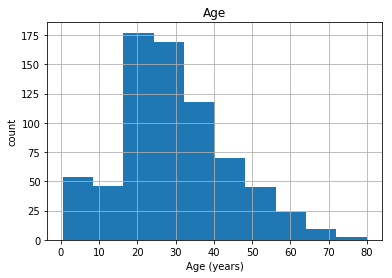

In [7]:
import matplotlib.pyplot as plt
# Plot 'Age' in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')

#### Customizing pandas import

The *pandas* package is great at dealing with many of the issues such as comments occuring in flat files, empty lines and missing values.